## Model Predictive Control in Autonomous driving 

### 1. Objective :

Design Model Predictive Control (MPC) to drive a car simulator. 

The server provides reference waypoints (yellow line in the demo video) via websocket

MPC to compute steering and throttle commands to drive the car with 100ms latency to prepare for real-world application.

At the same time, the MPC will optimize the actuators (steering and throttle), simulate the vehicle trajactory, and minimize the cost like cross-track error.


### 2. MPC Architecture :

### 2.1 Using Kinematic model
A kinematic model is implemented to control the vehicle around the track. Kinematic models are simplifications of dynamic models that ignore tire forces, gravity, and mass. This simplification reduces the accuracy of the models, but it also makes them more tractable.


##### State Vector:

* x: cars x position
* y: cars y position
* ψ (psi): vehicle's angle in radians from the x-direction (radians)
* ν: vehicle's velocity
* cte: cross track error
* eψ : orientation error

#### Update equations


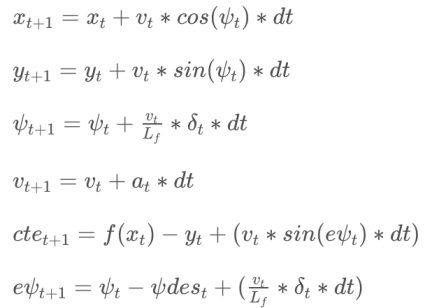

In [3]:
from IPython.display import Image
Image(filename='MPC-state_update.png') 

## 2.2 Timestep Length and Elapsed Duration (N & dt)
* N = 10
* dt = 0.05 s // tested with 1, 0.1, 0.01

The prediction horizon is the duration over which future predictions are made. We’ll refer to this as T. T is the product of two other variables, T = N * dt. In the case of driving a car, T should be a few seconds, at most. Beyond that horizon, the environment will change enough that it won't make sense to predict any further into the future. N and dt are hyperparameters you will need to tune for each model predictive controller you build. However, there are some general guidelines: T should be as large as possible, while dt should be as small as possible. These guidelines create tradeoffs.

These following dt has been tried 0.1, 0.001, 0.05 and 0.05 worked the best 

The goal of Model Predictive Control is to optimize the control inputs: [δ,a]. An optimizer will tune these inputs until a low cost vector of control inputs is found.

In addition to have the value of dt the performance of MPC also depend on N and the following
tuning parameters that we have in the cost function.
*  double tune_cte       = 1.0;
*  double tune_epsi      = 1.0;
*  double tune_v         = 1.0;
*  double tune_delta     = 1.0;
*  double tune_a         = 175.0 ;
*  double tune_delta_gap = 1000.0;
*  double tune_a_gap     = 1.0;


#### 2.3 Polynomial Fitting and MPC Preprocessing
Since the reference waypoints are given in the map global coordinate, and I transfer them into the car's coordinate by a funciton called mapToCarCoordinate(), then a 3rd order polynomial is fitted to waypoints.


#### 2.4 Model Predictive Control with Latency
In a real car, an actuation command won't execute instantly - there will be a delay as the command propagates through the system. A realistic delay might be on the order of 100 milliseconds, so in this project 100 millisecond latency is handled by Model Predictive Controller.

The latency is handled by using kinematic equations to predict the states for after 100ms before sending them to MPC.


#### Criteria # 1 : Code must compile without errors with cmake and make.

#### Criteria # 2 : MPC model description
1. state, 
2. actuators and 
3. update equations.

#### Criteria # 3 : Timestep Length and Elapsed Duration (N & dt)
1. the reasoning behind the chosen N (timestep length) and dt (elapsed duration between timesteps) values. 
2. Additionally the student details the previous values tried.

#### Criteria # 4 :  Polynomial Fitting and MPC Preprocessing
If the student preprocesses waypoints, the vehicle state, and/or actuators prior to
the MPC procedure it is described.


#### Criteria #5 :  Model Predictive Control with Latency
1. Implements Model Predictive Control that handles a 100 millisecond latency. 
2. Student provides details on how they deal with latency.

###### Criteria # 6 :  The vehicle must successfully drive a lap around the track.

No tire may leave the drivable portion of the track surface. 
The car may not pop up onto ledges or roll over any surfaces that would otherwise be considered unsafe (if humans were in the vehicle).

The car can't go over the curb, but, driving on the lines before the curb is ok.


This is a problem called "latency", and it's a difficult challenge for some controllers - like a PID controller - to overcome. But a Model Predictive Controller can adapt quite well because we can model this latency in the system.

### Detail implementation :

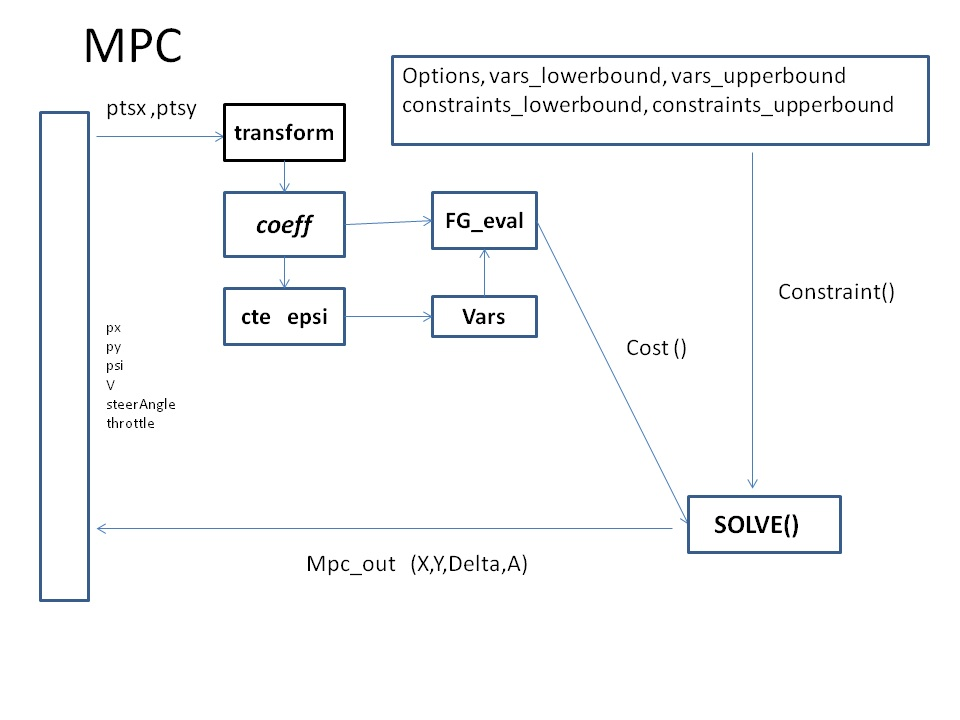

In [5]:
from IPython.display import Image
Image(filename='MPC.jpg')